# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

                                                    
combined_data_frame = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])


# Display the data table for preview
combined_data_frame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_data_frame["Mouse ID"].unique())
number_of_mice 

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data_frame.loc[combined_data_frame.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mouse



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_frame[combined_data_frame["Mouse ID"]== 'g989']



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_summary = combined_data_frame[combined_data_frame["Mouse ID"].isin(duplicate_mouse)==False]
clean_summary


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_summary["Mouse ID"].unique())

248

In [7]:
clean_summary.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#print(summary_stats)
# Print column names
#print(clean_summary.columns)

# Print DataFrame info
#print(clean_summary.info())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_mean = clean_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = clean_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_standard_dev = clean_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_standard_err = clean_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()



# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Vol": tumor_mean, 
                                  "Median Tumor Vol": tumor_median,
                                  "Tumor Vol Variance": tumor_variance, 
                                  "Tumor Vol Standard Dev": tumor_standard_dev,
                                  "Tumor Vol Standard Err": tumor_standard_err})

summary_statistics


,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Standard Dev,Tumor Vol Standard Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_summary.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

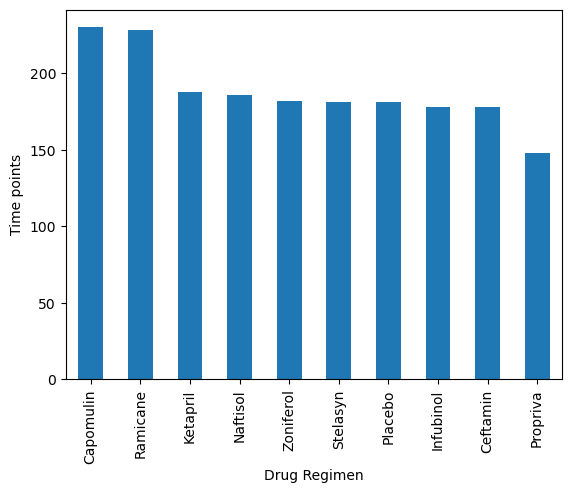

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
valuecounts = clean_summary["Drug Regimen"].value_counts()
valuecounts.plot(kind="bar")
plt.ylabel("Time points")
plt.show()


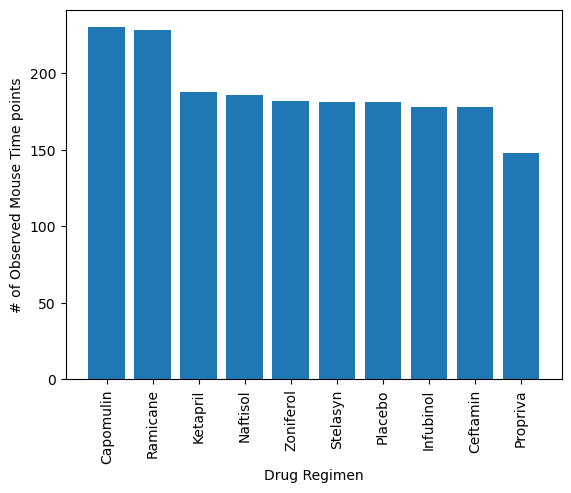

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_summary["Drug Regimen"].value_counts()
#valuecounts.plot(kind="bar")
plt.bar(counts.index.values, counts.values)
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Time points")
plt.xlabel("Drug Regimen")
plt.show()


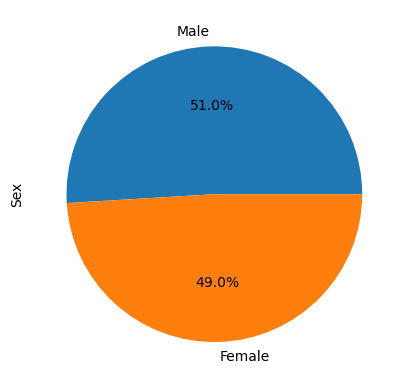

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas #.plot


counts = clean_summary["Sex"].value_counts()
counts.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


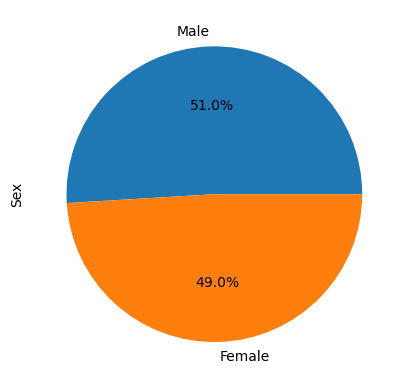

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot/.plt.pie
counts = clean_summary["Sex"].value_counts()
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_summary.groupby(["Mouse ID"])["Timepoint"].max()

max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_timepoint = max_timepoint.merge(clean_summary, how="left", on=["Mouse ID", "Timepoint"])
merge_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = merge_timepoint.loc[merge_timepoint["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data.append(volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volumes.loc[(volumes<lower_bound)|(volumes>upper_bound)]
    print(f"{treatment} has {outliers} outliers.")


Capomulin has Series([], Name: Tumor Volume (mm3), dtype: float64) outliers.
Ramicane has Series([], Name: Tumor Volume (mm3), dtype: float64) outliers.
Infubinol has 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 outliers.
Ceftamin has Series([], Name: Tumor Volume (mm3), dtype: float64) outliers.


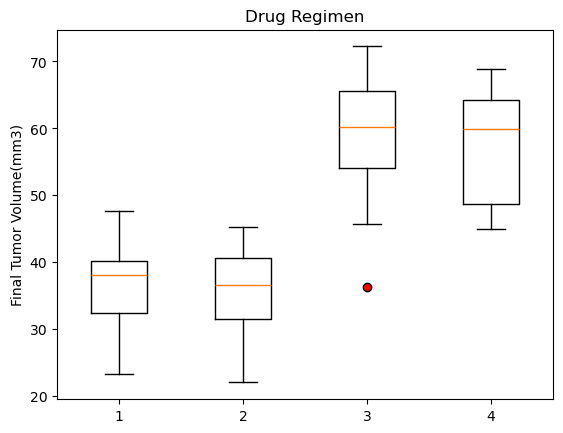

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
#ax1.set_xlabel()
ax1.set_ylabel('Final Tumor Volume(mm3)')
flierprops = dict(marker='o', markerfacecolor='red')
ax1.boxplot(tumor_data, flierprops = flierprops)
plt.show()

## Line and Scatter Plots

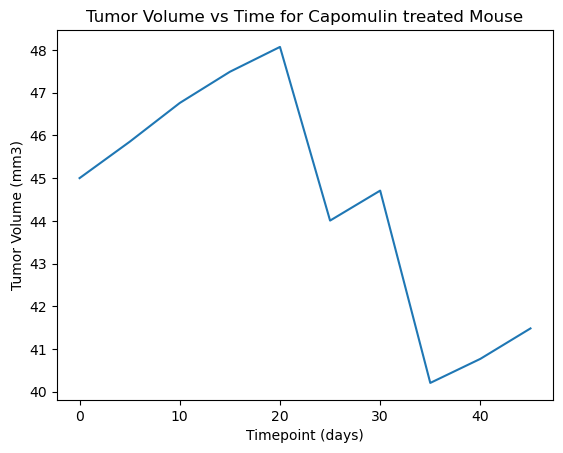

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Mouse ID 1509 (used in solution)
mouse_id = "l509"
filtered_data = clean_summary.loc[clean_summary['Mouse ID']== mouse_id]

tumor_vs_time = filtered_data["Tumor Volume (mm3)"]
time_point = filtered_data["Timepoint"]

plt.plot(time_point, tumor_vs_time)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Time for Capomulin treated Mouse")
plt.show()





In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_summary[clean_summary["Drug Regimen"]=="Capomulin"]
capomulin_data #testing to see data





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


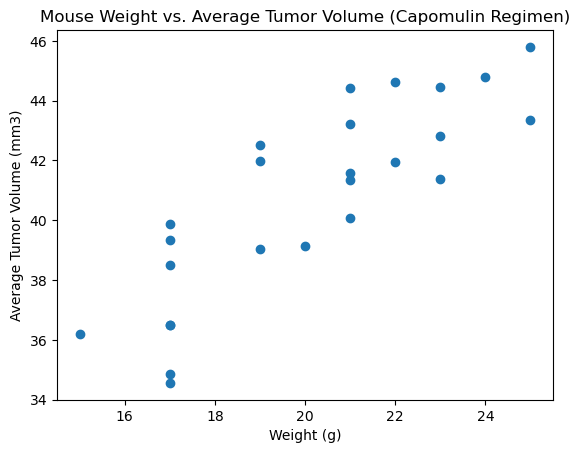

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_summary[clean_summary["Drug Regimen"]=="Capomulin"]

#mean
tumor_avg_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#weight 
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
#mouse_weight

#scatter plot 
plt.scatter(mouse_weight, tumor_avg_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.show()



## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and a linear regression model plt.plot
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_of_mouse = mouse_weight
avg_observed_tumor = tumor_avg_vol
correlation = st.pearsonr(weight_of_mouse,avg_observed_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


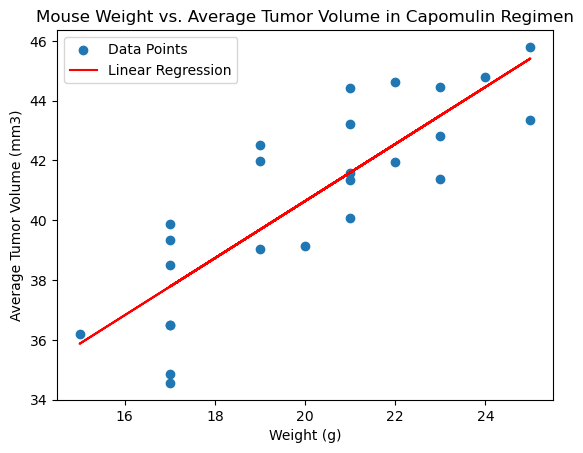

In [21]:
#linear regression model plt.plot
slope, intercept, r_value, p_value, sem = st.linregress(mouse_weight, tumor_avg_vol)
regression_line = slope * mouse_weight + intercept
plt.scatter(mouse_weight, tumor_avg_vol, label='Data Points')
plt.plot(mouse_weight, regression_line, color='red', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume in Capomulin Regimen')
plt.legend()
plt.show()
